# 6.2 Exploring Relationships

## 1. Importing Visualizaion Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This command ensures that any matplotlib plots will be displayed inline, directly in the Jupyter notebook.
%matplotlib inline

In [3]:
# Assign the path of the Gun Violence data folder to the variable 'path'.
path = r'C:\Users\ramis\OneDrive\JC\Data Analytics Course\Data Analytics Immersion\A6\Gun Violence'

In [4]:
# import clean data gun_violence_c2.pkl
df_gv = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'gun_violence_c2.pkl'))

In [5]:
df_gv.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,congressional_district,incident_characteristics,latitude,longitude,participant_age,participant_age_group,participant_gender,participant_status,participant_type,age_group_classification
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Known Age Group
1,460726,2013-01-01,California,Hawthorne,1,3,43.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,Known Age Group
2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,Known Age Group
3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,Known Age Group
4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,Known Age Group


## 2. Create a correlation matrix heatmap

In [6]:
# Create a subset dataframe containing only columns 'n_killed', 'n_injured', 'latitude', 'longitude' which are to be used for correlation heatmap
sub1 = df_gv[['n_killed', 'n_injured', 'latitude', 'longitude']]

In [7]:
sub1.head()

,n_killed,n_injured,latitude,longitude
0,0,4,40.3467,-79.8559
1,1,3,33.9090,-118.3330
2,1,3,41.4455,-82.1377
3,4,0,39.6518,-104.8020
4,2,2,36.1140,-79.9569


In [8]:
# create a simply correlation matrix utilizng pandas
sub1.corr()

,n_killed,n_injured,latitude,longitude
n_killed,1.000000,-0.125425,-0.080078,-0.062149
n_injured,-0.125425,1.000000,-0.011379,0.036962
latitude,-0.080078,-0.011379,1.000000,-0.056713
longitude,-0.062149,0.036962,-0.056713,1.000000


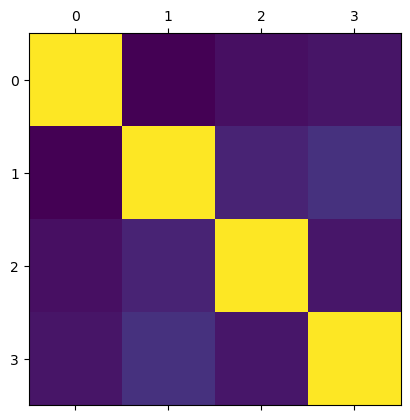

In [9]:
# Create a correlation heatmap by utilizing matplotlib
plt.matshow(sub1.corr())

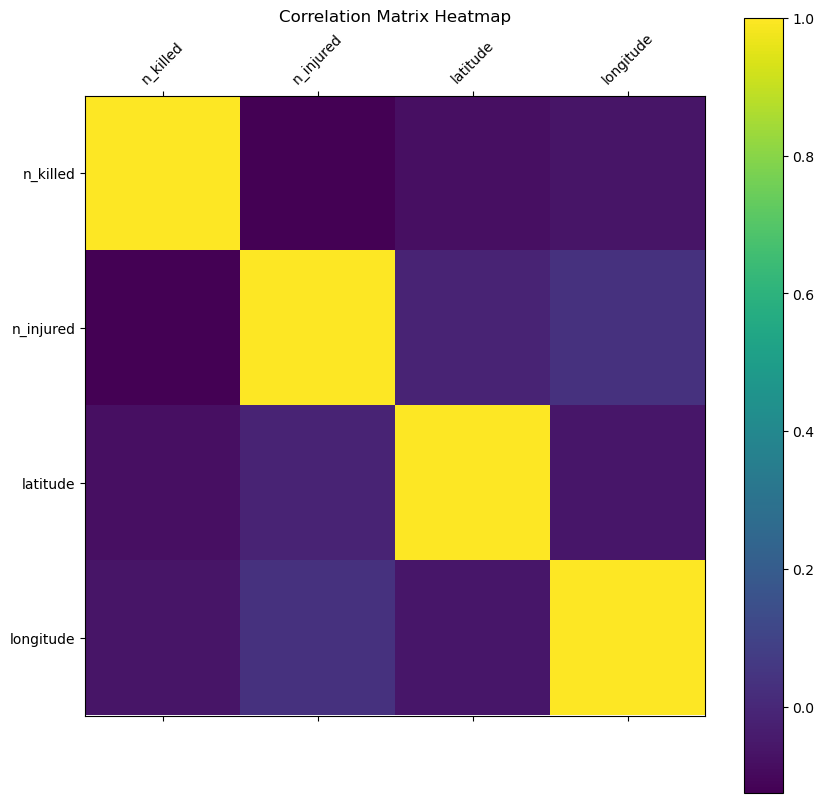

In [13]:
# Add Title. labels, and legend to the heatmap

# figure size 
f = plt.figure(figsize=(10, 10))
# type of plot
plt.matshow(sub1.corr(), fignum=f.number)
# add x axis labels
plt.xticks(range(sub1.shape[1]), sub1.columns, fontsize=10, rotation=45) 
# y axis labels
plt.yticks(range(sub1.shape[1]), sub1.columns, fontsize=10) 
# add a colorbar
cb = plt.colorbar() 
# add font size
cb.ax.tick_params(labelsize=10) 
# add title for Heatmap
plt.title('Correlation Matrix Heatmap', fontsize=12)
# Save heatmap to directory
plt.savefig("corr_heatmap.png")

#### The correlation matrix explained:
    The weak negative correlation between 'n_killed' and 'n_injured' (-0.125425) indicates that, generally, as the number of fatalities in an incident increases, the number of injuries decreases, perhaps suggesting that incidents with higher fatalities leave fewer survivors to injure. The weak negative correlation between 'n_killed' and 'latitude' (-0.080078) and 'longitude' (-0.062149) suggests a very slight tendency for incidents with more fatalities to occur at certain latitudes and longitudes, but the relationship is not strong enough to draw meaningful conclusions.

    Similarly, 'n_injured' has a very weak negative correlation with 'latitude' (-0.011379) and a very weak positive correlation with 'longitude' (0.036962), hinting that the number of injuries is not significantly dependent on the location within the United States. The latitude and longitude themselves have a weak negative correlation (-0.056713), indicating no meaningful relationship between the geographical coordinates of the incidents. Overall, these coefficients suggest that the number of casualties in gun violence incidents does not strongly correlate with the geographical location of the incident.

## 3. Create a scatterplot

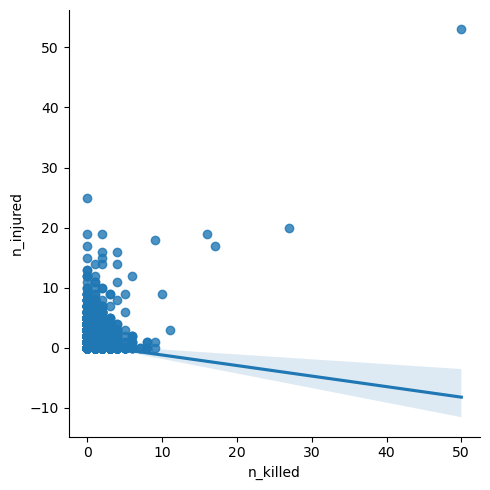

In [14]:
# Create a scatterplot for the variables with the strongest correlations: 'n_killed' and 'n_injured'
sns.lmplot(x = 'n_killed', y = 'n_injured', data = sub1)

#### The correlation matrix explained:
    The scatterplot suggests a positive, but weak, correlation between the number of people injured and killed in gun violence incidents; most data points cluster at lower values with outliers showing higher fatalities or injuries.
    The scatterplot indicates that incidents with higher fatalities tend to have fewer injuries, possibly suggesting that when more lethal guns are used, fewer victims survive to be counted as injured. This pattern reflects the unpredictable and varied nature of gun violence impacts.

## 4. Pair Plots

In [44]:
# ignore future warnings: I had to use the code below to suppress future warnings as I was getting a future warning related to seaborn when I try to create pair plots
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

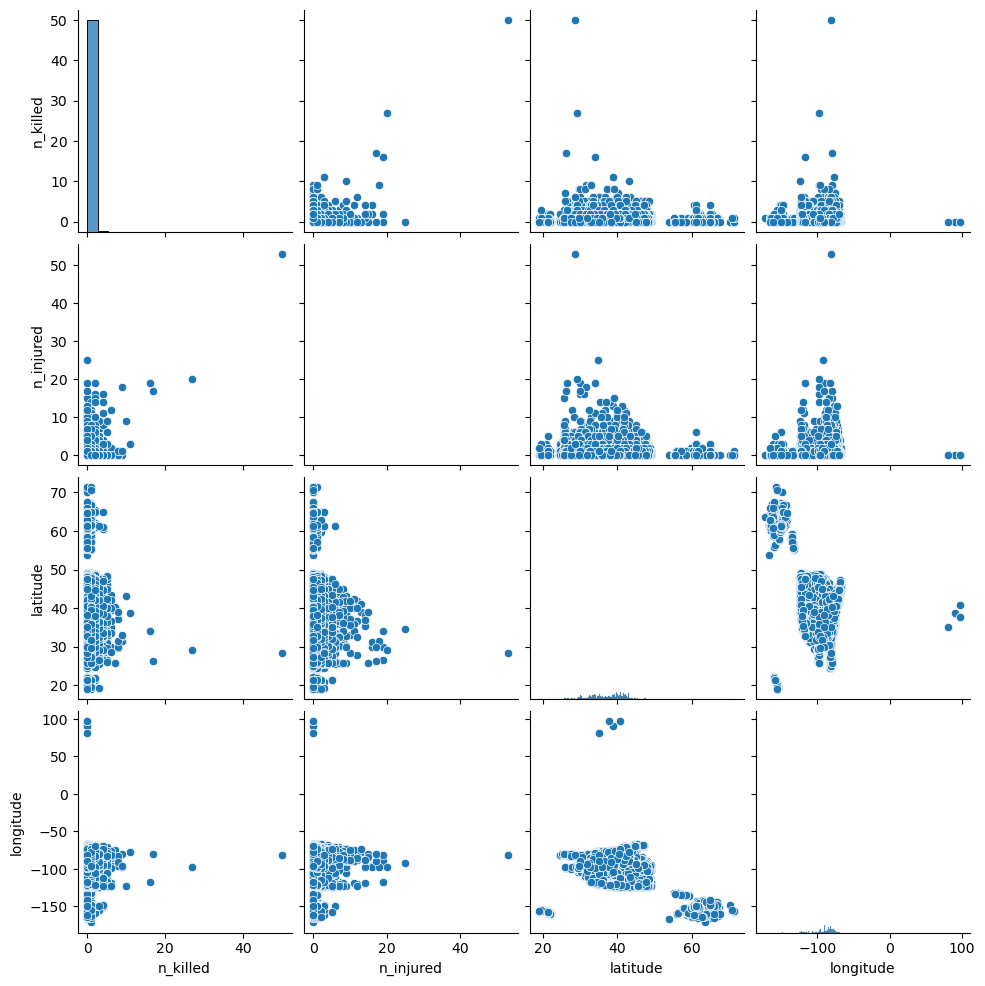

In [16]:
# Create a pair plot only for the columns 'n_killed', 'n_injured', 'latitude', 'longitude'
g = sns.pairplot(sub1)

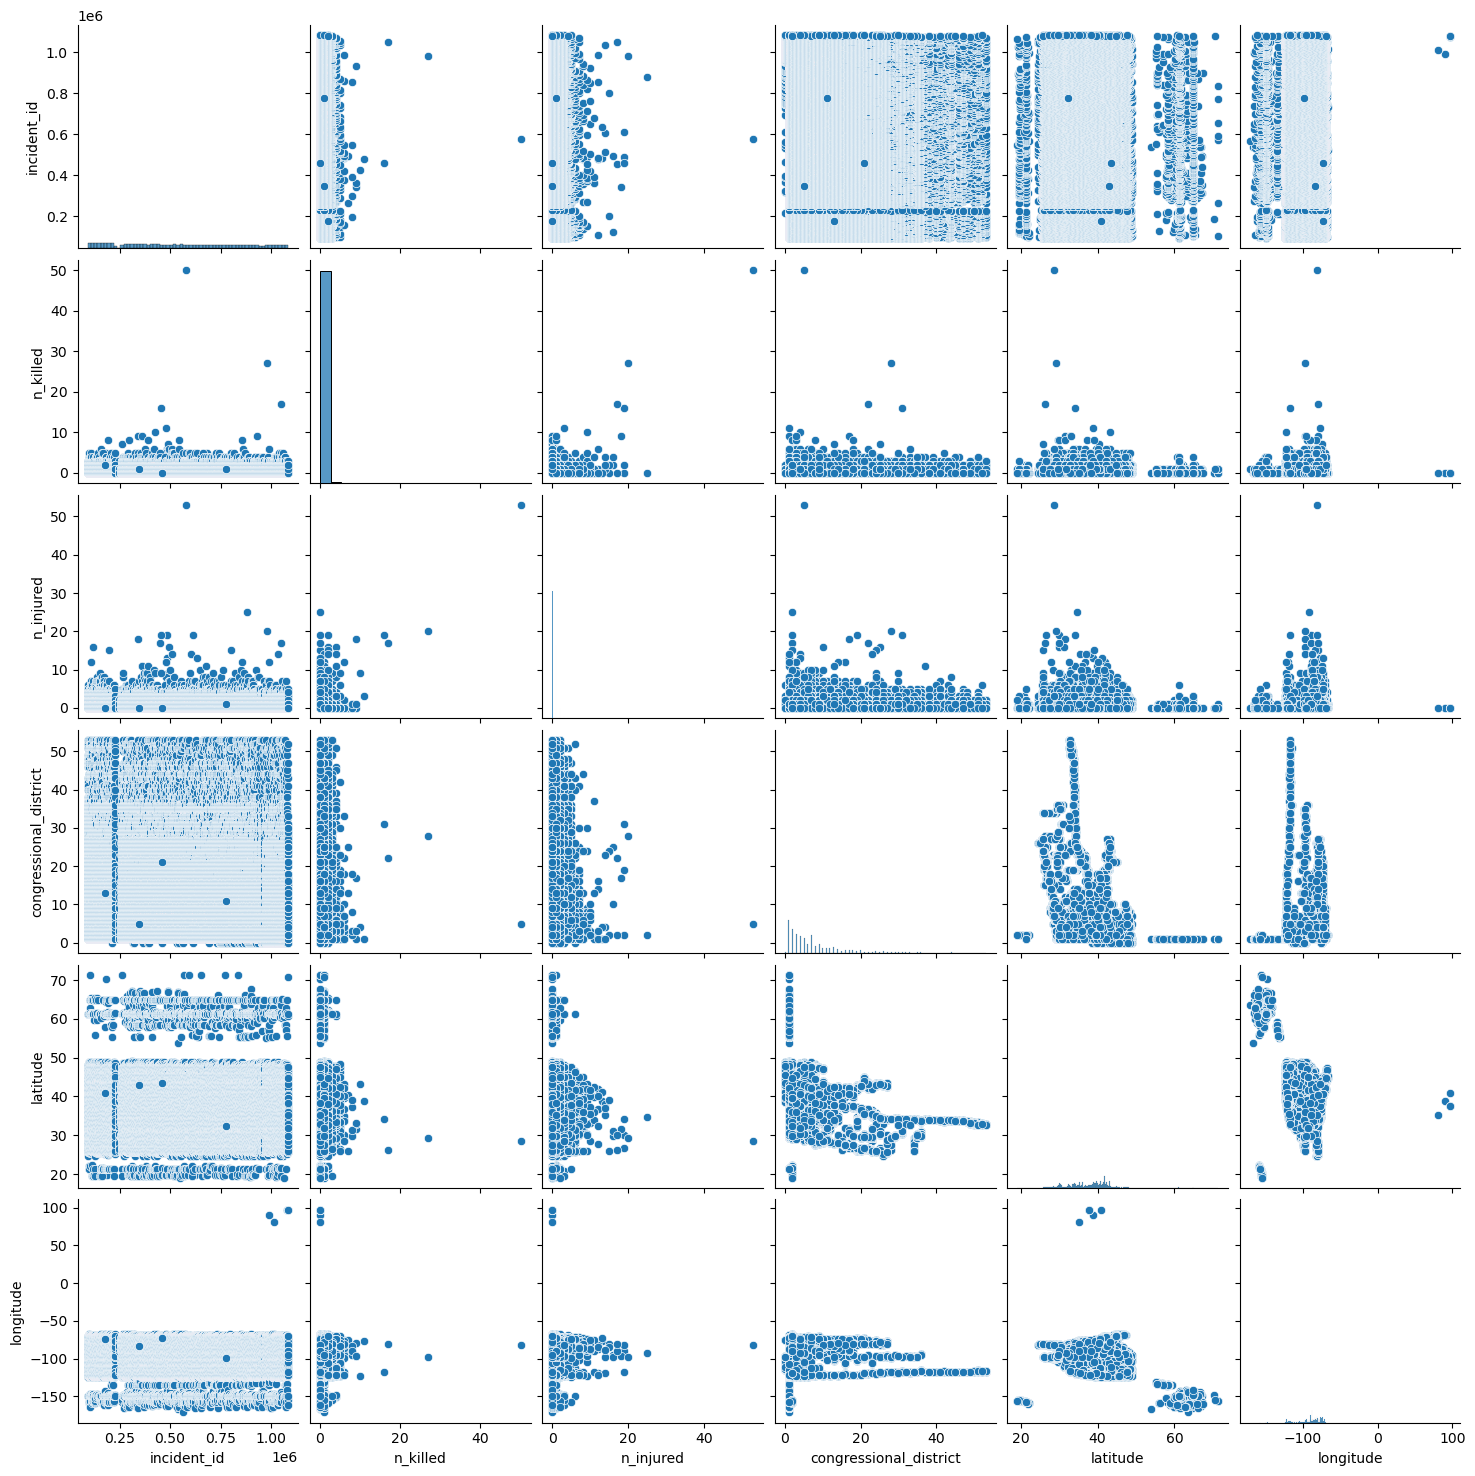

In [17]:
# Create a pair plot for the entire dataframe df_gv
g2 = sns.pairplot(df_gv)

## 5. Categorical Plot

In [29]:
# Define a function that categorizes each incident based on the number of killed and injured
def categorize_incident(row):
    total_victims = row['n_killed'] + row['n_injured']
    if total_victims >= 4:
        return 'Mass Shooting'
    elif total_victims >= 3:
        return 'Significant Incident'
    else:
        return 'Minor Incident'

# Apply the function to each row to create the new column
df_gv['severity_of_incident'] = df_gv.apply(categorize_incident, axis=1)

In [33]:
# check split of created categories in the new column
df_gv['severity_of_incident'].value_counts()

severity_of_incident
Minor Incident          233309
Significant Incident      4266
Mass Shooting             2102
Name: count, dtype: int64

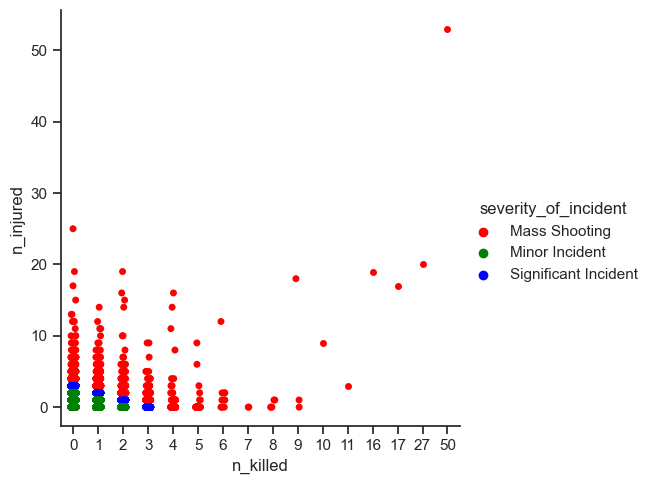

In [40]:
# Create a categorical plot utilizing seaborn using the severity_of_incident categories which I created above
palette_colors = {'Mass Shooting': 'red', 'Significant Incident': 'blue', 'Minor Incident': 'green'}
g3 = sns.catplot(x="n_killed", y="n_injured", hue="severity_of_incident", palette=palette_colors, data=df_gv)

In [41]:
# save plot
g3.savefig("sev_categorical_plot.png")

## 6. Revisit the questions from E 6.1 and adding new ones.
#### Based on the early findings in my visual exploration, I can only answer the question below:
How do the numbers of killed and injured vary across different incidents?
We can consider that this question was answered in the category plot above showing the severity of incidents based on the number of participants killed and/or injured.
The categorization created above reflects the scale of gun violence incidents. "Minor Incidents" often involve fewer than 3 victims, indicating a lower level of harm. "Significant Incidents" encompass events with 3-4 victims, suggesting a more serious impact. "Mass Shootings" involve 4 or more victims, indicating the most severe and broad-reaching effects in terms of casualties. The vast majority are Minor Incidents, while Significant Incidents and Mass Shootings are comparatively rarer, reflecting their escalating severity and impact.

### New questions that have arisen:

1. What is the distribution of severity levels (Minor Incident, Significant Incident, Mass Shooting) across different states or different months?
2. How has the severity of incidents changed over time?

## 7. Define any hypotheses at this point
  Here are some hypotheses that could be tested:
  
1)
•	Null Hypothesis: The distribution of Mass Shootings is uniform across all states.

•	Alternative Hypothesis: Mass Shootings are more likely to occur in certain states compared to others.

2) 
•	Null Hypothesis: The proportion of Mass Shootings has not increased over the years covered by the dataset.

•	Alternative Hypothesis: There is an increasing trend in the proportion of Mass Shootings over the years.

3)
•	Null Hypothesis: The distribution of Mass Shootings is uniform across democratic vs republican states.

•	Alternative Hypothesis: The distribution of Mass Shootings is higher in republican states

## 8. Exporting the actual dataframe to pkl

In [42]:
# export df_gv to pkl to save the changes we've done so far and to preserve the data types of the columns
df_gv.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'gun_violence_c3.pkl'))